In [32]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

%matplotlib inline


auto = pd.read_csv(r'C:\Users\Dell 5300\PorabaAnakonda\auto-mpg.csv')

auto.isnull().sum()
#auto.horsepower = auto.horsepower.astype(float)
#auto.convert_objects(convert_numeric=True).dtypes
auto["horsepower"] = pd.to_numeric(auto.horsepower, errors='coerce')
print(auto.head(400))
auto.info()



      mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0  3504.0          12.0   
1    15.0          8         350.0       165.0  3693.0          11.5   
2    18.0          8         318.0       150.0  3436.0          11.0   
3    16.0          8         304.0       150.0  3433.0          12.0   
4    17.0          8         302.0       140.0  3449.0          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0  2790.0          15.6   
394  44.0          4          97.0        52.0  2130.0          24.6   
395  32.0          4         135.0        84.0  2295.0          11.6   
396  28.0          4         120.0        79.0  2625.0          18.6   
397  31.0          4         119.0        82.0  2720.0          19.4   

     model year  origin                     car name  
0            70       1  \tchevrolet chevelle malibu  
1            70       1  

C:\Users\Dell 5300\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


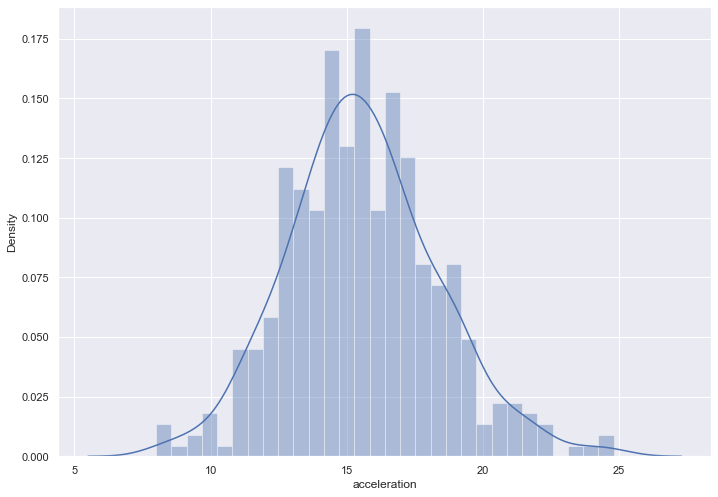

In [38]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(auto['acceleration'], bins=30)
plt.show()

<AxesSubplot:>

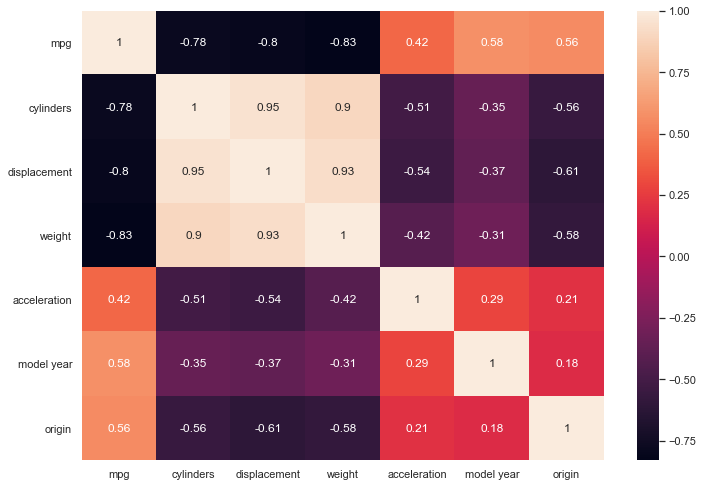

In [14]:
correlation_matrix = auto.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

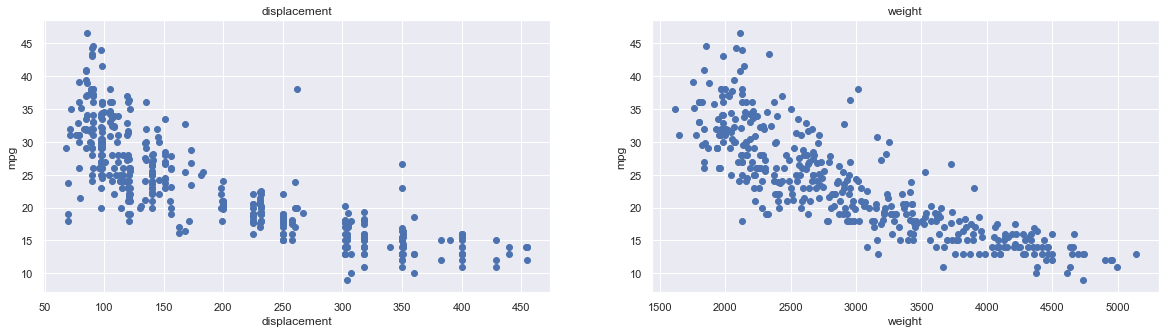

In [41]:
plt.figure(figsize=(20, 5))

features = ['displacement', 'weight']
target = auto['mpg']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = auto[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('mpg')

In [44]:
X = pd.DataFrame(np.c_[auto['displacement'], auto['weight']], columns = ['displacement','weight'])
Y = auto['mpg']


from sklearn.model_selection import train_test_split

# véletlenszerűen tanuló 80% : tesztelő 20% adatok
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

(318, 2)
(80, 2)
(318,)
(80,)


LinearRegression()

In [45]:

y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# majd a tesztelőn

y_test_predict = lin_model.predict(X_test)
# a négyzetes hiba
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

# r-négyzet értéke
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 4.252348569392167
R2 score is 0.7030583596057888


The model performance for testing set
--------------------------------------
RMSE is 4.446250228874398
R2 score is 0.6666502269031076


In [69]:
df = pd.read_csv(r'C:\Users\Dell 5300\PorabaAnakonda\auto-mpg.csv')
df = df.drop('car name', 1)
df["horsepower"] = pd.to_numeric(df.horsepower, errors='coerce')
df.dropna()
df.isnull().sum()
df
df.info()

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)
clean_dataset(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0
...,...,...,...,...,...,...,...,...
393,27.0,4.0,140.0,86.0,2790.0,15.6,82.0,1.0
394,44.0,4.0,97.0,52.0,2130.0,24.6,82.0,2.0
395,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,1.0
396,28.0,4.0,120.0,79.0,2625.0,18.6,82.0,1.0


In [70]:
y=df.pop('mpg')
X_train, X_test, Y_train, Y_test = train_test_split(df.to_numpy(),y, test_size=0.2)
model = LinearRegression().fit(X_train, Y_train)
#lin_model.fit(X_train, Y_train)

In [71]:
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2 is different from 7)

In [65]:
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2 is different from 7)